In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

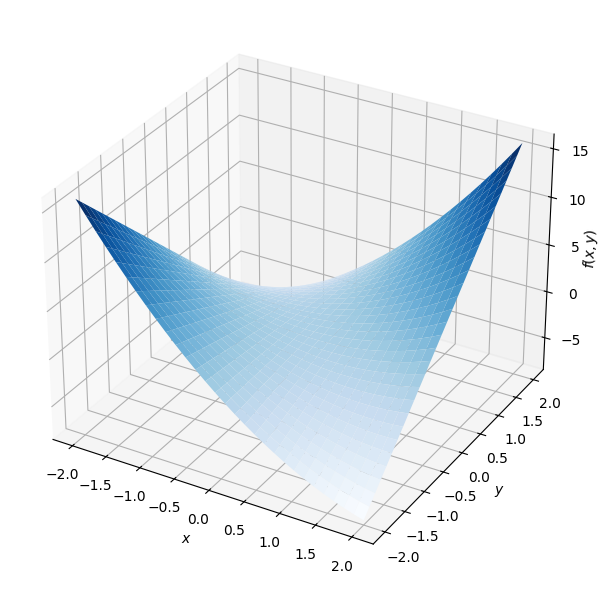

In [3]:
# Define the function f(x, y) = x^2 + 3xy
def f(x, y):
    return x**2 + 3*x*y

# Define partial derivatives
def partial_x(x, y):
    return 2*x + 3*y  # ∂f/∂x

def partial_y(x, y):
    return 3*x  # ∂f/∂y

# Create a grid
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 6))

# Plot the function f(x, y) 
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(X, Y, Z, cmap='Blues')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$f(x,y)$', labelpad=-2)

plt.tight_layout()
plt.savefig('figures/multivariable_function.pdf', bbox_inches='tight')

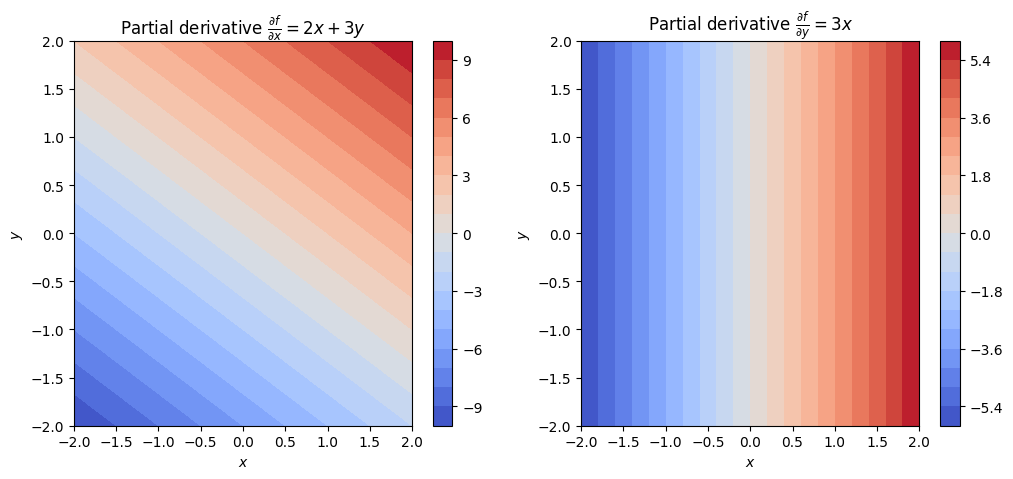

In [4]:
# Plot partial derivatives 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ∂f/∂x
Z_x = partial_x(X, Y)
ax2 = axes[0]
contour_x = ax2.contourf(X, Y, Z_x, cmap='coolwarm', levels=20)
fig.colorbar(contour_x, ax=ax2)
ax2.set_title(r"Partial derivative $\frac{\partial f}{\partial x} = 2x + 3y$")
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')

# Plot ∂f/∂y
Z_y = partial_y(X, Y)
ax3 = axes[1]
contour_y = ax3.contourf(X, Y, Z_y, cmap='coolwarm', levels=20)
fig.colorbar(contour_y, ax=ax3)
ax3.set_title(r"Partial derivative $\frac{\partial f}{\partial y} = 3x$")
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')

plt.savefig('figures/partial_derivatives.pdf', bbox_inches='tight')

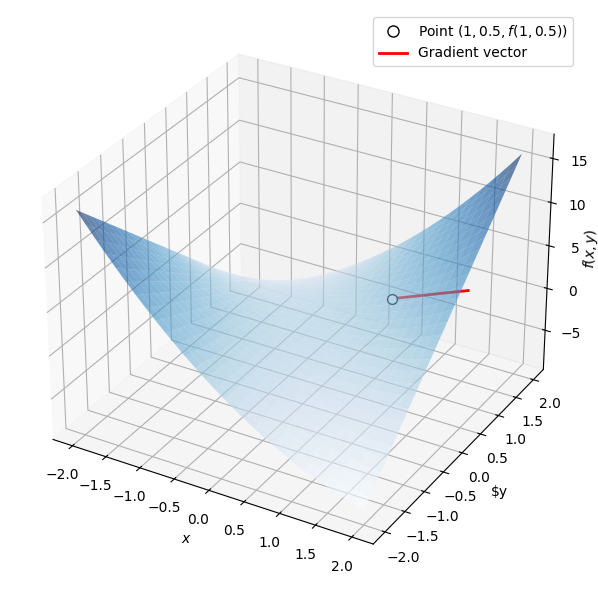

In [5]:
# Define the gradient components
def grad_f(x, y):
    df_dx = 2*x + 3*y  # ∂f/∂x
    df_dy = 3*x        # ∂f/∂y
    return np.array([df_dx, df_dy])

# Plot the gradient vector at a selected point
x0, y0 = 1, 0.5 
grad = grad_f(x0, y0)  
z0 = f(x0, y0)  

# Create a mesh grid for surface plotting
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D surface plot with a normalized gradient vector
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(projection='3d')

# Plot the surface 
ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6)

# Plot the normalized gradient vector slightly above the surface,
# giving it a small upward z-component
ax.quiver(
    x0, y0, z0 + 0.5,      # start a little above the surface
    grad[0], grad[1], 0.5, # small upward z-component
    color='red',
    length=1,
    normalize=True,
    linewidth=2,
    arrow_length_ratio=0
)

# Mark the selected point, also shifted slightly above for visibility
ax.scatter(
    x0, y0, z0 + 0.5,
    color='white',
    edgecolors='black',
    s=50,
    label=rf"Point $({x0},{y0}, f({x0},{y0}))$"
)

ax.set_xlabel('$x$')
ax.set_ylabel('$y')
ax.set_zlabel('$f(x, y)$', labelpad=-2)

# Add a custom legend entry for the gradient vector
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markeredgecolor='black',
           markersize=8, label=rf"Point $({x0},{y0}, f({x0},{y0}))$"),
    Line2D([0], [0], color='red', lw=2, label="Gradient vector")  # Red line representing gradient
]

ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.savefig('figures/gradient.pdf', bbox_inches='tight')